In [1]:
import numpy as np 
import cmath 

from qiskit import QuantumCircuit, transpile
from qiskit import Aer, execute
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram

from project_qsiris.conversion_qo_qiskit import odyssey_to_qiskit,load_oddysey_puzzle

In [2]:
#Enable this line if you plan to use IBM Q Experience and run these circuit on real IBM hw (and see results in IBMQ)
#IBMQ.load_account()

## Templates (with filled examples) :

### Example 001: steps to create a Qiskit circuit out of a QO puzzle (using example_002.qpf)

In [3]:
#Step 1: Read the QO puzzle file (has extension .qpf). 
#If you want to change the puzzle file, simply add the new path or puzzle in path= folder

path = "circuits/odyssey_circuits/X_CTRL_H.qpf"
puzzle = load_oddysey_puzzle(path)

import numpy as np 
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister 
 
nr_q=2 
qc = QuantumCircuit(QuantumRegister(2), ClassicalRegister(2)) 
 
qc.x(0) 
qc.id(1) 
unit=array([[ 1.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j],
       [ 0.        +0.j,  1.        +0.j,  0.        +0.j,
         0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710679+0.j,
         0.70710679+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710679+0.j,
        -0.70710679+0.j]]) 
qubits=[0, 1] 
name="c_0_h_1_" 
qc.unitary(unit,qubits[::-1],name) 
qc.measure(qc.qregs[0][0], qc.cregs[0][1]) 
qc.measure(qc.qregs[0][1], qc.cregs[0][0]) 



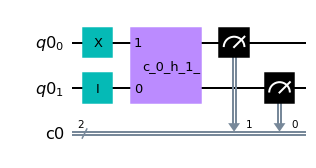

In [4]:
#Step 2: convert your QO puzzle to a Qiskit circuit  and draw the mpl

qc,qiskit_circuit = odyssey_to_qiskit(puzzle, incl_initial_state = False,
                      use_barrier = False,
                      incl_all_measurements = True)
qc.draw('mpl')

In [6]:
print(qiskit_circuit)

import numpy as np 
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister 
 
nr_q=2 
qc = QuantumCircuit(QuantumRegister(2), ClassicalRegister(2)) 
 
qc.x(0) 
qc.id(1) 
unit=array([[ 1.        +0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j],
       [ 0.        +0.j,  1.        +0.j,  0.        +0.j,
         0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710679+0.j,
         0.70710679+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710679+0.j,
        -0.70710679+0.j]]) 
qubits=[0, 1] 
name="c_0_h_1_" 
qc.unitary(unit,qubits[::-1],name) 
qc.measure(qc.qregs[0][0], qc.cregs[0][1]) 
qc.measure(qc.qregs[0][1], qc.cregs[0][0]) 



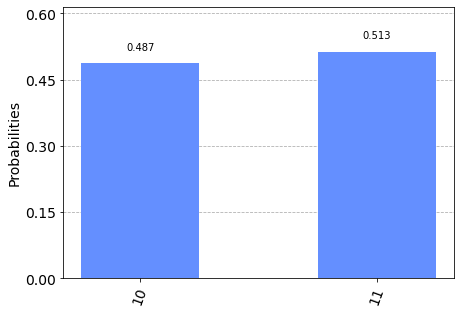

In [5]:
#Step 3: Run your puzzle on a qiskit simulator and plot counts

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend,shots=1000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

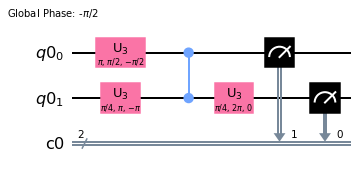

In [22]:
backend = Aer.get_backend('qasm_simulator')
result = transpile(qc, backend=backend, optimization_level=3)
result.draw('mpl')

In [19]:
result.qasm(formatted=True, filename='circuit_test.qasm')

OPENQASM 2.0;
include "qelib1.inc";
qreg q0[2];
creg c0[2];
u3(pi,pi/2,-pi/2) q0[0];
u3(pi/4,pi,-pi) q0[1];
cz q0[1],q0[0];
u3(pi/4,2*pi,0) q0[1];
measure q0[1] -> c0[0];
measure q0[0] -> c0[1];



In [18]:
qc.qasm(formatted=True, filename='circuit_test.qasm')

OPENQASM 2.0;
include "qelib1.inc";
qreg q0[2];
creg c0[2];
x q0[0];
id q0[1];
gate c_0_h_1_ p0,p1 {
	u3(3*pi/4,0,-2*pi) p0;
	u3(pi/2,2*pi,0) p1;
	cx p0,p1;
	u3(3*pi/4,pi,-pi) p0;
	u3(pi/2,0,pi) p1;
}
c_0_h_1_ q0[1],q0[0];
measure q0[0] -> c0[1];
measure q0[1] -> c0[0];



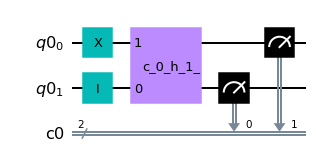

In [15]:
new_qc=QuantumCircuit.from_qasm_file('circuit_test.qasm')
new_qc.draw('mpl')

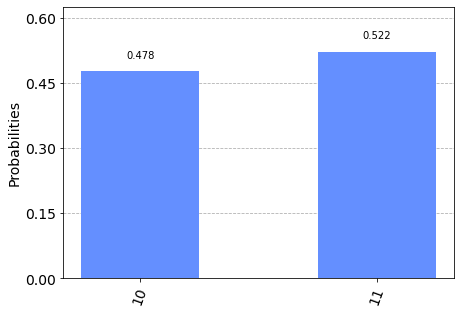

In [16]:
backend = Aer.get_backend('qasm_simulator')
job = execute(new_qc, backend,shots=1000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### Now let's run the circuit on a real IBM device:

In [ ]:
#Step 4: Run your puzzle on a real QPU from IBM. You can customize the execution here.
# It will take some time for the job to be executed

provider = IBMQ.get_provider('ibm-q')
ibm_QPU=provider.get_backend('ibmq_santiago')

job=execute(qc, backend=ibm_QPU, shots=100)
job_monitor(job,interval=10) 

In [ ]:
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### Another example (similar to previous, different gates):

In [ ]:
path = "circuits/odyssey_circuits/asdasd.qpf"

In [ ]:
res = load_oddysey_puzzle(path)
res.keys()

In [ ]:
qc = odyssey_to_qiskit(res, incl_initial_state = False,
                      use_barrier = False,
                      incl_all_measurements = True)

qc.draw('mpl')

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend,shots=1000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [ ]:
backend = Aer.get_backend('qasm_simulator')
result = transpile(qc, backend=backend, optimization_level=3)
result.draw(output='mpl')

In [ ]:
# This runbook is for testing how much you can approximate decimals if Qiskit is still able to rec as unitary
# It is important to have as many decimals as possible 
# Otherwise we can get unitary errors (even if we can introduce the gate in the circuit) .

unit=[[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
      [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
      [ 0.+0.j,  0.+0.j,  0.70710679+0.j,  0.70710679+0.j],#np.sqrt(1/2)+0.j,  np.sqrt(1/2)+0.j],
      [ 0.+0.j,  0.+0.j,  0.70710679+0.j, -0.70710679+0.j],]#np.sqrt(1/2)+0.j,  -np.sqrt(1/2)+0.j],]#0.70710679+0.j, -0.70710679+0.j],]


qc=QuantumCircuit(2)
qc.unitary(unit,[0,1])
qc.draw()

In [ ]:
print(qc.qasm())